# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Observations:

 - We can can observe that at this time of the year, the maximum temperatures for the cities increases as we go from the Southern Hemisphere towards the equator (latitude at 0). The hottest cities can be found clustered around the equator. Once past the equator, the maximum temperatures steadily declines as we are heading towards the Northern Hemisphere.
 
 
 - When we've ran and plotetd the data for Maximum Temperatures v Lattitude, it was Autumn in Australia (Southern Hemisphere) where we currently resides and would be Spring in the Northern Hemisphere on the other side of the world. The plot produced an upsidedown U shape. Given the nature of the earth's seasons, and the hemispheres always being in opposite seasons. We can assume that the spread may be slightly different, but this upside down U shape will be the main feature of this plot no matter what time of the year we ran this.
 
 
 - Through our analysis we can determine that the humidity, cloudiness and wind speed levels are very sporadic and not predictive. It seems that these weather conditions are very random and it does not matter which hemispehre you are in. This would indicate that looking for the perfect holiday destination by analysing these factors alone will not be sufficient. A further refining and analysis will be required inorder for us to find our desired destinations.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress
import os
import csv
from datetime import datetime
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
# (https://pypi.org/project/citipy/#data) - Look for nearest city with geo coordinates.
# installation in command prompt - pip install citipy
from citipy import citipy


# Output File (CSV)
output_data_file = "output_data/output_data_cities.csv"

## Generate Cities List

In [2]:
# Set the variable ranges to match Earth's x & y axis (latitudes and longitudes) 
latitudes_range = (-90, 90)
longitudes_range = (-180, 180)

# List for holding latitudes longitude and cities
latitudes_longitude = []
list_of_cities = []

# Use numpy random uniform to get a random sampling of latitudes and longitudes that will have 0 probability of going outside the rages
# https://www.sharpsightlabs.com/blog/np-random-uniform/
latitudes = np.random.uniform(size=1500,low=-90.000, high=90.000)
longitudes = np.random.uniform(size=1500,low=-180.000, high=180.000)

# Use zip() is to map the latitudes, longitudes so that they can be used as single entity
latitudes_longitudes = zip(latitudes, longitudes)

# Use list comprehension to loop through the latitudes & longitude ranges that has been randomly generated
# Use citipy parameters to return the name of the nearest city to the coordinates (https://github.com/wingchen/citipy) 
for latitudes_longitudes in latitudes_longitudes:
    city = citipy.nearest_city(latitudes_longitudes[0], latitudes_longitudes[1]).city_name
    
# If the city returned is not on the list then add it to list_of_cities
    if city not in list_of_cities:
        list_of_cities.append(city)


In [3]:
# Print lenth to confirm that we've met the criteria there are more than 500 cities 
len(list_of_cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# API from https://openweathermap.org/current
base_url = "http://api.openweathermap.org/data/2.5/weather?"

print("Beginning Data Retrieval ")
print("-----------------------------")

# list to hold data
site_weather_data = []

# counters to keep track of loop and record number of loops
set_counter = 1
record_counter = 1

for city in list_of_cities:
    # # Set the parameters required for base url as prescribed by open weather map
    # Check if celsius is required use units metric    
    params = {
    "appid":api_key,
    "units":"imperial",
        "q": city
                }
    
    #API request and response
    response = requests.get(base_url, params=params)

    # When a city is not found.. notify and keep going
    if response.ok == False:
        print("City not found. Skipping...")
        continue
    
    # Where data is available collect & append list
    else:    
        response_json = response.json()
        response_output = {
            "City":response_json["name"],
            "Lat":response_json["coord"]["lat"],
            "Lng":response_json["coord"]["lon"],
            "Max Temp":response_json["main"]["temp_max"],
            "Humidity":response_json["main"]["humidity"], 
            "Cloudiness":response_json["clouds"]["all"],
            "Wind Speed":response_json["wind"]["speed"],
            "Country":response_json["sys"]["country"],
            "Date":response_json["dt"]                    
            }
        site_weather_data.append(response_output)
        
        
        print(f"Processing record {record_counter}  of set {set_counter}| {response_output['City']}")
        
        # Adjust counters so a new set is added when counter at every 100th interval
        record_counter += 1
        if record_counter % 20 == 0:
            set_counter += 1
        continue
        
      
  
            # notify the end of search

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing record 1  of set 1| Atuona
Processing record 2  of set 1| Dingle
City not found. Skipping...
Processing record 3  of set 1| Vadsø
Processing record 4  of set 1| Provideniya
Processing record 5  of set 1| Bredasdorp
City not found. Skipping...
Processing record 6  of set 1| Saint-Joseph
Processing record 7  of set 1| Caconda
Processing record 8  of set 1| Cidreira
Processing record 9  of set 1| Hilo
Processing record 10  of set 1| Hāveri
Processing record 11  of set 1| Mar del Plata
Processing record 12  of set 1| Avarua
Processing record 13  of set 1| Yambio
Processing record 14  of set 1| Mahébourg
Processing record 15  of set 1| Balabac
Processing record 16  of set 1| Saint-Philippe
Processing record 17  of set 1| Lompoc
Processing record 18  of set 1| Nikolskoye
Processing record 19  of set 1| Kapaa
Processing record 20  of set 2| Hithadhoo
Processing record 21  of set 2| Lesozavodsk
Processing record 22  of set 2| T

Processing record 184  of set 10| Natal
Processing record 185  of set 10| Nara
Processing record 186  of set 10| Caluquembe
Processing record 187  of set 10| Isangel
Processing record 188  of set 10| Chapais
Processing record 189  of set 10| San Andrés
Processing record 190  of set 10| Longyearbyen
Processing record 191  of set 10| Rumuruti
Processing record 192  of set 10| Kamenka
Processing record 193  of set 10| Katsuura
City not found. Skipping...
Processing record 194  of set 10| Kungurtug
Processing record 195  of set 10| Vila Franca do Campo
Processing record 196  of set 10| Fereydūnkenār
Processing record 197  of set 10| Longhua
Processing record 198  of set 10| Nemuro
Processing record 199  of set 10| Ous
Processing record 200  of set 11| Ambon City
Processing record 201  of set 11| Moerai
Processing record 202  of set 11| Pangnirtung
Processing record 203  of set 11| Banda Aceh
Processing record 204  of set 11| Cayenne
Processing record 205  of set 11| Urucará
Processing reco

Processing record 366  of set 19| Tha Mai
Processing record 367  of set 19| Karpogory
Processing record 368  of set 19| Derzhavīnsk
Processing record 369  of set 19| Avera
Processing record 370  of set 19| Xiongzhou
Processing record 371  of set 19| Bacsay
Processing record 372  of set 19| Jamame
Processing record 373  of set 19| Hualmay
Processing record 374  of set 19| Pereslavl'-Zalesskiy
Processing record 375  of set 19| Richards Bay
Processing record 376  of set 19| Handan
Processing record 377  of set 19| Tabas
Processing record 378  of set 19| Byron Bay
Processing record 379  of set 19| Ha Tinh
Processing record 380  of set 20| Abonnema
Processing record 381  of set 20| Zhirnovsk
Processing record 382  of set 20| Voh
Processing record 383  of set 20| Tsil'na
Processing record 384  of set 20| Quatre Cocos
Processing record 385  of set 20| Letlhakane
Processing record 386  of set 20| Nome
Processing record 387  of set 20| Shirokiy
Processing record 388  of set 20| Mossamedes
City 

Processing record 544  of set 28| Cap-Chat
Processing record 545  of set 28| Port Lincoln
Processing record 546  of set 28| Mantenópolis
Processing record 547  of set 28| Araouane
Processing record 548  of set 28| Plettenberg Bay
Processing record 549  of set 28| Saint-Augustin
Processing record 550  of set 28| Antalaha
Processing record 551  of set 28| Sittwe
Processing record 552  of set 28| Camalú
Processing record 553  of set 28| Bam
Processing record 554  of set 28| Aksha
Processing record 555  of set 28| Langham
Processing record 556  of set 28| Fort Nelson
Processing record 557  of set 28| Pirovskoye
Processing record 558  of set 28| Rock Springs
Processing record 559  of set 28| Mangulile
Processing record 560  of set 29| Oyama
Processing record 561  of set 29| Livingstone
Processing record 562  of set 29| Green River
-----------------------------
Data Retrieval Complete
-----------------------------


In [23]:
# Check response to work out data postions to record
pprint(response_json)

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 41.5286, 'lon': -109.4662},
 'dt': 1616124989,
 'id': 5826559,
 'main': {'feels_like': 29.7,
          'humidity': 60,
          'pressure': 1022,
          'temp': 39.2,
          'temp_max': 39.2,
          'temp_min': 39.2},
 'name': 'Green River',
 'sys': {'country': 'US',
         'id': 5674,
         'sunrise': 1616073842,
         'sunset': 1616117256,
         'type': 1},
 'timezone': -21600,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 200, 'speed': 9.22}}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
# Display output as DataFrame
site_weather_data_df = pd.DataFrame(site_weather_data)
site_weather_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,5.620000e+02
mean,20.465729,18.606057,53.719715,72.478648,55.724199,7.740925,1.616125e+09
std,33.285577,89.618656,26.889710,20.206344,39.388559,5.730716,2.499672e+02
min,-54.800000,-179.166700,-25.640000,8.000000,0.000000,0.290000,1.616124e+09
25%,-7.930350,-59.300075,33.800000,62.000000,11.250000,3.530000,1.616124e+09
50%,24.030750,23.641050,60.845000,76.500000,73.500000,6.110000,1.616125e+09
75%,48.842875,92.109825,75.652500,88.000000,93.750000,10.360000,1.616125e+09
max,78.218600,178.416700,100.400000,100.000000,100.000000,37.890000,1.616125e+09


In [25]:
# Export the city data into a .csv
site_weather_data_df.to_csv("output_data/cities_weather.csv", index=False, header=True)


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [26]:
#  Get the indices of cities that have humidity over 100%.
site_weather_data_df[site_weather_data_df['Humidity'].gt(100)].index

Int64Index([], dtype='int64')

In [27]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
clean_city_data_df = site_weather_data_df[site_weather_data_df['Humidity'].values < 100]

# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,5.480000e+02
mean,19.782059,19.587299,54.029726,71.775547,55.239051,7.660456,1.616125e+09
std,33.142025,90.205941,27.067158,19.971616,39.591693,5.646190,2.502629e+02
min,-54.800000,-179.166700,-25.640000,8.000000,0.000000,0.290000,1.616124e+09
25%,-8.198275,-58.866825,33.800000,61.750000,9.750000,3.485000,1.616124e+09
50%,22.622500,25.121300,61.760000,76.000000,70.000000,6.040000,1.616125e+09
75%,47.716625,93.505350,75.967500,87.000000,94.000000,10.360000,1.616125e+09
max,77.484000,178.416700,100.400000,99.000000,100.000000,37.890000,1.616125e+09


In [28]:
# format the date column
clean_city_data_df["Date"]= pd.to_datetime(clean_city_data_df["Date"], format='%m/%d/%Y', errors='ignore')
clean_city_data_df.head()

<ipython-input-28-32f03a4dcfe8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_city_data_df["Date"]= pd.to_datetime(clean_city_data_df["Date"], format='%m/%d/%Y', errors='ignore')


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,80.94,77,4,11.36,PF,1616124211
1,Dingle,10.9995,122.6711,86.47,66,62,8.59,PH,1616124422
2,Vadsø,70.0744,29.7487,3.20,92,82,6.91,NO,1616124424
3,Provideniya,64.3833,-173.3000,1.40,60,0,2.24,RU,1616124426
4,Bredasdorp,-34.5322,20.0403,60.80,94,100,6.91,ZA,1616124381


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

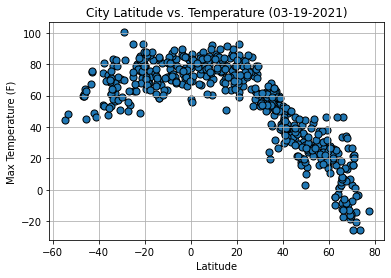

In [29]:
#date = site_weather_data_df["Converted Date"][0]
#date = site_weather_data_df["Date"].dt.strftime('%m/%d/%Y')

date = datetime.now()
date = date.strftime("%m-%d-%Y")

# Plot data frame City Latitude vs. Max Temperature 
plot1 = clean_city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", edgecolor='k', facecolor='b', s=50)
plot1.set_title(f"City Latitude vs. Temperature ({date})")
plot1.set_xlabel("Latitude");
plot1.set_ylabel("Max Temperature (F)");
plot1.grid();
plt.savefig("images/latitude_vs_temp.png")

The code is anaylsing and plotting the cities going from Southern Hemisphere to Northern Hemisphere and it's maximum temperature on this date.

## Latitude vs. Humidity Plot

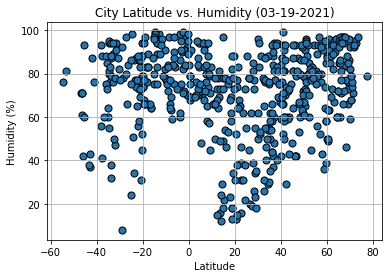

In [30]:
# Plot data frame City Latitude vs. Humidity
plot1 = clean_city_data_df.plot(kind="scatter", x="Lat", y="Humidity", edgecolor='k', facecolor='b', s=50)
plot1.set_title(f"City Latitude vs. Humidity ({date})")
plot1.set_xlabel("Latitude");
plot1.set_ylabel("Humidity (%)");
plot1.grid();
plt.savefig("images/latitude_vs_humidity.png")

Here the code is anaylsing and plotting the cities going from Southern Hemisphere to Northern Hemisphere and their humidity levels on this date.

## Latitude vs. Cloudiness Plot

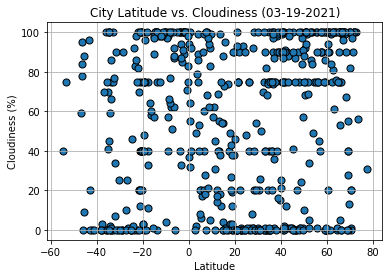

In [31]:
# Plot data frame City Latitude vs. Cloudiness
plot1 = clean_city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", edgecolor='k', facecolor='b', s=50)
plot1.set_title(f"City Latitude vs. Cloudiness ({date})")
plot1.set_xlabel("Latitude");
plot1.set_ylabel("Cloudiness (%)");
plot1.grid();
plt.savefig("images/latitude_vs_Cloudiness.png")

Here the code is anaylsing and plotting the cities going from Southern Hemisphere to Northern Hemisphere and their cloudiness levels on this date.

## Latitude vs. Wind Speed Plot

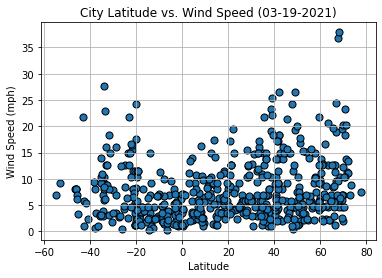

In [32]:
# Plot data frame City Latitude vs. Wind Speed
plot1 = clean_city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", edgecolor='k', facecolor='b', s=50)
plot1.set_title(f"City Latitude vs. Wind Speed ({date})")
plot1.set_xlabel("Latitude");
plot1.set_ylabel("Wind Speed (mph)");
plot1.grid();
plt.savefig("images/latitude_vs_Wind_Speed.png")

Here the code is anaylsing and plotting the cities going from Southern Hemisphere to Northern Hemisphere and their wind speeds on this date.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

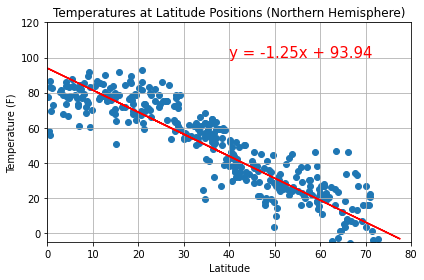

The r-value is: 0.8254149352235458


<Figure size 432x288 with 0 Axes>

In [33]:
#Set dataframe for hemispheres
# Equator is at 0° latitude, anything greater is Northern andything thats not is Southern
# ~ tilde sign (https://stackoverflow.com/questions/46054318/tilde-sign-in-python-dataframe)
hems = clean_city_data_df['Lat'] > 0
northern_hem_df = clean_city_data_df[hems]
southern_hem_df  = clean_city_data_df[~hems]

x_values = northern_hem_df['Lat']
y_values = northern_hem_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,100),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(-5, 120)
plt.xlim(0, 80)
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()

plt.savefig("images/Temperatures_at_Northern_Hemisphere).png")

print(f"The r-value is: {rvalue**2}")

This modeling shows the temperatures in then Northern Hemisphere. There's is a strong negative correlation and indicates that the temperatures decreases as we head into the Northern Hemisphere. The r-value reveals how well our regression model fits the observed data. We can observe that 82% of the data fits the regression model.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

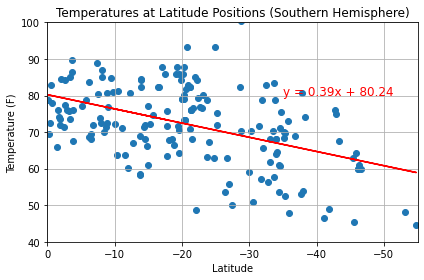

The r-value is: 0.21912328156027114


<Figure size 432x288 with 0 Axes>

In [34]:
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(40, 100)
plt.xlim(0, -55)
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
print(f"The r-value is: {rvalue**2}")
plt.savefig("images/Temperatures_at_Southern_Hemisphere).png")

This modeling shows the temperatures in then Southern Hemisphere. There's is a weak negative correlation and indicates that the temperatures decreases as we head into the Southern Hemisphere. The r-value reveals that our regression model does not fit well in the observed data. We can observe that 22% of the data fits the regression model.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

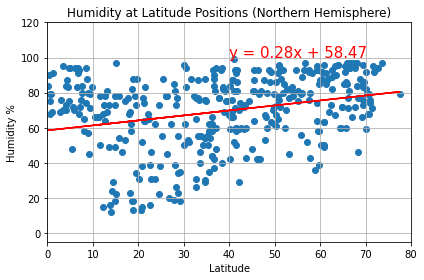

The r-value is: 0.0777497906177988


<Figure size 432x288 with 0 Axes>

In [35]:
x_values = northern_hem_df['Lat']
y_values = northern_hem_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,100),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.ylim(-5, 120)
plt.xlim(0, 80)
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
print(f"The r-value is: {rvalue**2}")
plt.savefig("images/Humidity_at_Northern_Hemisphere).png")

This modeling shows the Humidity levels in then Northern Hemisphere. There's is an extremely weak positive correlation and indicates that the Humidity levels increases as we head into the Northern Hemisphere. The r-value reveals that our regression model does not fit well in the observed data. We can observe that 8% of the data fits the regression model.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

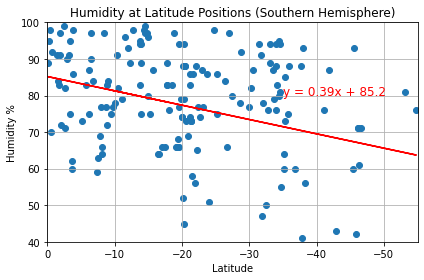

The r-value is: 0.0902654779996436


<Figure size 432x288 with 0 Axes>

In [36]:
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.ylim(40, 100)
plt.xlim(0, -55)
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
print(f"The r-value is: {rvalue**2}")
plt.savefig("images/Humidity_at_Southern_Hemisphere).png")

This modeling shows the Humidity levels in then Southern Hemisphere. There's is an extremely weak negative correlation and indicates that the Humidity levels decreases as we head into the Southern Hemisphere. The r-value reveals that our regression model does not fit well in the observed data. We can observe that 9% of the data fits the regression model.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

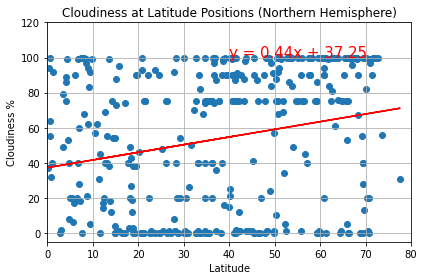

The r-value is: 0.05037702517039159


<Figure size 432x288 with 0 Axes>

In [37]:
x_values = northern_hem_df['Lat']
y_values = northern_hem_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,100),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.ylim(-5, 120)
plt.xlim(0, 80)
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
print(f"The r-value is: {rvalue**2}")
plt.savefig("images/Cloudiness_at_Northern_Hemisphere).png")

This modeling shows the Cloud levels in then Northern Hemisphere. There's is an extremely weak positive correlation and indicates that the cloud levels increases as we head into the Northern Hemisphere. The r-value reveals that our regression model does not fit well in the observed data. We can observe that 5% of the data fits the regression model.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

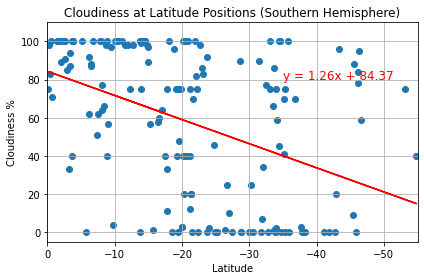

The r-value is: 0.17350532432834287


<Figure size 432x288 with 0 Axes>

In [38]:
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.ylim(-5, 110)
plt.xlim(0, -55)
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
print(f"The r-value is: {rvalue**2}")
plt.savefig("images/Cloudiness_at_Southern_Hemisphere).png")

This modeling shows the cloud levels in then Southern Hemisphere. There's is an extremely weak negative correlation and indicates that the cloud levels decreases as we head into the Southern Hemisphere. The r-value reveals that our regression model does not fit well in the observed data. We can observe that 17% of the data fits the regression model.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

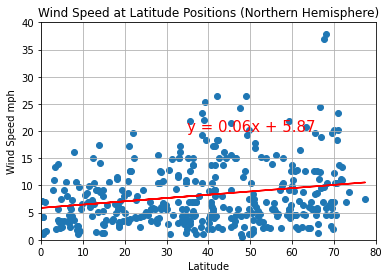

The r-value is: 0.045397893261992416


<Figure size 432x288 with 0 Axes>

In [39]:
x_values = northern_hem_df['Lat']
y_values = northern_hem_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(35,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed mph')
plt.ylim(0, 40)
plt.xlim(0, 80)
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()
print(f"The r-value is: {rvalue**2}")
plt.savefig("images/Winds_at_Northern_Hemisphere).png")

This modeling shows the wind speeds levels in then Northern Hemisphere. There's is an extremely weak positive correlation and indicates that the wind speeds increases as we head into the Northern Hemisphere. The r-value reveals that our regression model does not fit well in the observed data. We can observe that 5% of the data fits the regression model.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

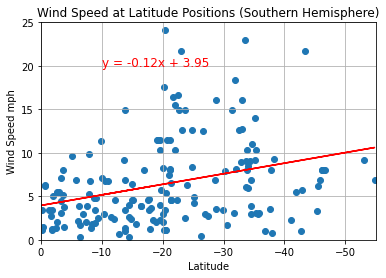

The r-value is: 0.09395868156454368


<Figure size 432x288 with 0 Axes>

In [40]:
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-10,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed mph')
plt.ylim(0, 25)
plt.xlim(0, -55)
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()
print(f"The r-value is: {rvalue**2}")
plt.savefig("images/Winds_at_Southern_Hemisphere).png")

This modeling shows the wind speeds in then Southern Hemisphere. There's is an extremely weak positive correlation and indicates that the wind speeds increases as we head into the Southern Hemisphere. The r-value reveals that our regression model does not fit well in the observed data. We can observe that 9% of the data fits the regression model.